In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation
import imageio 

In [2]:
datadir ='/Users/francesco/Desktop/Thesis/Data/'

# Read the dataframes
df = pd.read_csv(datadir + 'Merged_Integrated_melt_rates.csv')
df_err = pd.read_csv(datadir + 'Merged_Integrated_melt_err_rates_second_method.csv')

In [3]:
#extracting the variables from the dataset


#Name of the glaciars in the error file
NameError = df_err.values[:,0]
print(NameError.shape)

#Measument years
Years = df.columns[1:].values.astype(int)
print(Years[1])  #PROBLEM: the second year is not 1993, but 1994

#Melt rates
Melting_rates = df.values[:,1:]
Melting_rates = np.array(Melting_rates, dtype=np.float32)

#Glacier names
Glacier = df.values[:,0]
print(Glacier[0])

#Errors of the melt rates
errors = df_err.values[:,1:]
errors = np.array(errors, dtype=np.float32)

(183,)
1994
Dawson_Lambton


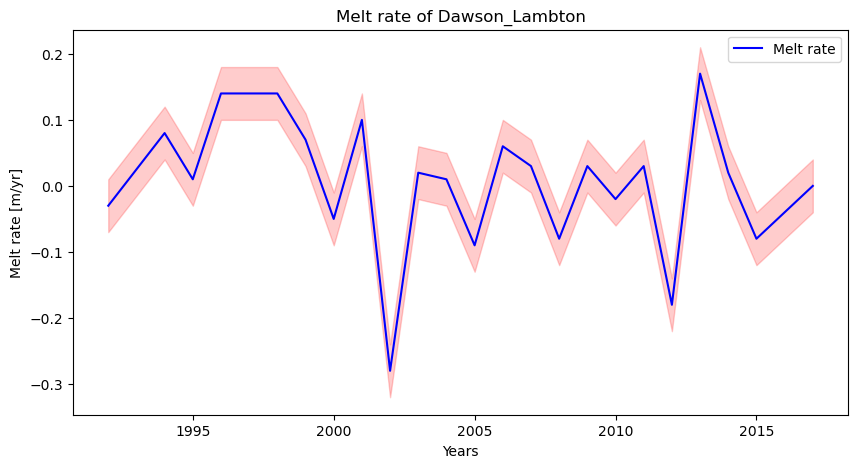

In [4]:
#Print the first time series of the dataset with its error as a shaded area
plt.figure(figsize=(10,5))
plt.plot(Years, Melting_rates[0,:], color='blue', label='Melt rate')
plt.fill_between(Years, Melting_rates[0,:]-errors[0,:], Melting_rates[0,:]+errors[0,:], color='red', alpha=0.2)
plt.xlabel('Years')
plt.ylabel('Melt rate [m/yr]')
plt.title('Melt rate of ' + Glacier[0])
plt.legend()
plt.show()


In [5]:
#Interesting Variables 

num_glaciers = len(Glacier)
lin_coeff = np.zeros((num_glaciers,2))
lin_coeff_to_dataframe = []

lin_reg = np.zeros((num_glaciers,len(Years)))


r_2 = np.zeros(num_glaciers)
mean_basal_melt = np.zeros(num_glaciers)
std_basal_melt = np.zeros(num_glaciers)

time_series_basal_melt = np.zeros((num_glaciers,len(Years)))
time_series_basal_melt_to_dataframe = []

In [6]:
#Interesting variables calculation 

for i in range(0, len(Glacier)):

    lin_coeff[i,:] = np.polyfit(Years, Melting_rates[i,:], 1)
    lin_coeff_to_dataframe.append(lin_coeff[i,:])

    time_series_basal_melt[i,:] = Melting_rates[i,:]
    time_series_basal_melt_to_dataframe.append(time_series_basal_melt[i,:])


    lin_reg[i,:] = np.polyval(lin_coeff[i,:], Years)
    r_2[i] = r2_score(Melting_rates[i,:], lin_reg[i,:])
    mean_basal_melt[i] = np.mean(Melting_rates[i,:])
    std_basal_melt[i] = np.std(Melting_rates[i,:])
    

In [7]:
#Plotting all the glaciers

'''
#All the glaciers plot
with PdfPages('Glaciers.pdf') as pdf:
    for i in range(0, len(Glacier)):

        fig = plt.figure()

        plt.scatter(Years, Melting_rates[i,:],label = Glacier[i] + ' Melting rate measurements', s = 1)
        plt.plot(Years, lin_reg[i,:],label = Glacier[i] + ' linear regression' + 'Lineat trend: ' + str(round(lin_coeff[i,0],3)) + ' m/yr')
        plt.fill_between(Years, Melting_rates[i,:]-errors[i,:], Melting_rates[i,:]+errors[i,:], color='red', alpha=0.2)

        plt.legend()
        plt.xlabel('Years')
        plt.ylabel('Melting rates')

        #In the title I want to print the R2 value, rounded with 2 decimals
        plt.title('Melting rates of ' + Glacier[i] + ', R2 = ' + str(round(r_2[i],3)) )




        pdf.savefig(fig) 
        plt.close()

'''

"\n#All the glaciers plot\nwith PdfPages('Glaciers.pdf') as pdf:\n    for i in range(0, len(Glacier)):\n\n        fig = plt.figure()\n\n        plt.scatter(Years, Melting_rates[i,:],label = Glacier[i] + ' Melting rate measurements', s = 1)\n        plt.plot(Years, lin_reg[i,:],label = Glacier[i] + ' linear regression' + 'Lineat trend: ' + str(round(lin_coeff[i,0],3)) + ' m/yr')\n        plt.fill_between(Years, Melting_rates[i,:]-errors[i,:], Melting_rates[i,:]+errors[i,:], color='red', alpha=0.2)\n\n        plt.legend()\n        plt.xlabel('Years')\n        plt.ylabel('Melting rates')\n\n        #In the title I want to print the R2 value, rounded with 2 decimals\n        plt.title('Melting rates of ' + Glacier[i] + ', R2 = ' + str(round(r_2[i],3)) )\n\n\n\n\n        pdf.savefig(fig) \n        plt.close()\n\n"

In [8]:
#Plot of the first 6 glaciers with higher melting rates

'''
#I copied the dataframe in order to sort it
df_sort = df
# I add acolumn with the mean of the melting rates in second position
df_sort.insert(1, 'Mean', df_sort.mean(axis=1))
mean = df_sort['Mean'].values

# Sort according to mean of melting rates
df_sort = df_sort.sort_values(by=['Mean'], ascending=False)

#We start from second position since the second colun is the mean
Melting_rates_sort = df_sort.values[:,2:]
Glacier_sort = df_sort.values[:,0]

Melting_rates_sort 
#Convert to numpy array
Melting_rates_sort = np.array(Melting_rates_sort, dtype=np.float32)

for i in range(0, 5):
    plt.plot(Years, Melting_rates_sort[i,:],label=Glacier_sort[i])
plt.legend()
plt.xlabel('Years')
plt.ylabel('Melting rates')
plt.title('Melting rates of the 5 faste glaciers in Antartica')
plt.show()

'''

"\n#I copied the dataframe in order to sort it\ndf_sort = df\n# I add acolumn with the mean of the melting rates in second position\ndf_sort.insert(1, 'Mean', df_sort.mean(axis=1))\nmean = df_sort['Mean'].values\n\n# Sort according to mean of melting rates\ndf_sort = df_sort.sort_values(by=['Mean'], ascending=False)\n\n#We start from second position since the second colun is the mean\nMelting_rates_sort = df_sort.values[:,2:]\nGlacier_sort = df_sort.values[:,0]\n\nMelting_rates_sort \n#Convert to numpy array\nMelting_rates_sort = np.array(Melting_rates_sort, dtype=np.float32)\n\nfor i in range(0, 5):\n    plt.plot(Years, Melting_rates_sort[i,:],label=Glacier_sort[i])\nplt.legend()\nplt.xlabel('Years')\nplt.ylabel('Melting rates')\nplt.title('Melting rates of the 5 faste glaciers in Antartica')\nplt.show()\n\n"

In [9]:
#I select the most interesting glaciers and I plot them


#FORSE DA CAMPIARE GLACIERS CON NAMES CALCOLATO DOPO
interesting_glaciers = ['Pine_Island', 'Thwaites', 'Crosson', 'Dotson', 'Getz_2', 'Venable']
interesting_indices = np.where(np.isin(Glacier, interesting_glaciers))[0]


print(interesting_indices)
print(Glacier[interesting_indices])
len(Glacier[interesting_indices])

#Plot of the most interesting glaciers with linear regression and error
'''
fig, axs = plt.subplots(3, 2, figsize=(15,10))
fig.suptitle('Melt rates of the 6 most interesting glaciers')


for i in range(len(interesting_indices)):
    axs[i//2,i%2].scatter(Years, Melting_rates[interesting_indices[i],:], color='blue', label='Melt rate', s=1)
    axs[i//2,i%2].plot(Years, lin_reg[interesting_indices[i],:], color='green', label='Linear regression' + str(round(lin_coeff[interesting_indices[i],0],3)) + ' m/yr')
    axs[i//2,i%2].fill_between(Years, Melting_rates[interesting_indices[i],:]-errors[interesting_indices[i],:], Melting_rates[interesting_indices[i],:]+errors[interesting_indices[i],:], color='red', alpha=0.2)
    axs[i//2,i%2].set_title(Glacier[interesting_indices][i])
    axs[i//2,i%2].set_xlabel('Years')
    axs[i//2,i%2].set_ylabel('Melt rate [m/yr]')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].xaxis.set_label_coords(0.5, -0.2)

#PDF
plt.savefig('Interesting_glaciers.pdf', bbox_inches='tight', dpi=300)
plt.show()

'''

[43 61 67 68 69 71]
['Getz_2' 'Venable' 'Pine_Island' 'Thwaites' 'Crosson' 'Dotson']


"\nfig, axs = plt.subplots(3, 2, figsize=(15,10))\nfig.suptitle('Melt rates of the 6 most interesting glaciers')\n\n\nfor i in range(len(interesting_indices)):\n    axs[i//2,i%2].scatter(Years, Melting_rates[interesting_indices[i],:], color='blue', label='Melt rate', s=1)\n    axs[i//2,i%2].plot(Years, lin_reg[interesting_indices[i],:], color='green', label='Linear regression' + str(round(lin_coeff[interesting_indices[i],0],3)) + ' m/yr')\n    axs[i//2,i%2].fill_between(Years, Melting_rates[interesting_indices[i],:]-errors[interesting_indices[i],:], Melting_rates[interesting_indices[i],:]+errors[interesting_indices[i],:], color='red', alpha=0.2)\n    axs[i//2,i%2].set_title(Glacier[interesting_indices][i])\n    axs[i//2,i%2].set_xlabel('Years')\n    axs[i//2,i%2].set_ylabel('Melt rate [m/yr]')\n    axs[i//2,i%2].legend()\n    axs[i//2,i%2].xaxis.set_label_coords(0.5, -0.2)\n\n#PDF\nplt.savefig('Interesting_glaciers.pdf', bbox_inches='tight', dpi=300)\nplt.show()\n\n"

In [10]:
import glob
import pandas as pd
import os
from shapely.geometry import shape
import csv
#from mapxy import mapxy
import pyproj
#from ps_latlon_conversion import xyscale_south
import pyproj
#import ogr
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
#from read_tiff import read_tiff
# Open the geotiff file
years=np.arange(1992,2018)

In [11]:
#Vergin Romain Code


'''
for year in years:
    file_tif="/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif"
    a = gdal.Open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    print("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    band=a.GetRasterBand(1)
# region Get the projection information
    proj_wkt = a.GetProjection()
    in_proj = pyproj.CRS.from_wkt(proj_wkt)
# endregion
    # region Create the output projection
    out_proj = pyproj.CRS.from_epsg(4326)

    melt=rasterio.open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    # endregion
    
    # region Open the shapefile
    shapefile_path = "/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/SHP_JB/ice_shelf.shp"
    shapefile_ds = ogr.Open(shapefile_path)

    shapefile=fiona.open(shapefile_path)
    # endregion
    
    # List to store latitude and longitude coordinates
    lat_lon_coords = []

    
    ME_Gt_list=[]
    names_list=[]
    for feature in shapefile:
        name=feature['properties']['name']
        geometry=feature['geometry']
        id=feature['id']

        bounds=shape(geometry).bounds
        xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]
        print(xmin,ymin,xmax,ymax)
        os.system('gdalwarp -t_srs EPSG:3031 -te '+str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+file_tif+' '+id+'_temp.tif')

'''

'\nfor year in years:\n    file_tif="/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif"\n    a = gdal.Open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")\n    print("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")\n    band=a.GetRasterBand(1)\n# region Get the projection information\n    proj_wkt = a.GetProjection()\n    in_proj = pyproj.CRS.from_wkt(proj_wkt)\n# endregion\n    # region Create the output projection\n    out_proj = pyproj.CRS.from_epsg(4326)\n\n    melt=rasterio.open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")\n    # endregion\n    \n    # region Open the shapefile\n    shapefile_path = "/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/SHP_JB/ice_shelf.shp"\n    shapefile_ds = ogr.Open(shapefile_path)\n\n    shapefile=fiona.open(shapefile_pa

In [12]:
#get information from the shp file, without creating the output tif files

path_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop//Thesis/Data/ice_shelf.shp'

ids = []
Names = []
lat_lon_coords = []
regions = []
boundaries = []



shapefile=fiona.open(shapefile_path)
print(shapefile.schema['properties'])


for feature in shapefile:


    id = feature['properties']['id']
    name=feature['properties']['name']
    geometry=feature['geometry']
    if geometry is None:
        continue
    region = feature['properties']['regions']
    lat = feature['properties']['latitude']
    lon = feature['properties']['longitude']

    bounds=shape(geometry).bounds
    xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]


    #Taking the info
    ids.append(id)
    Names.append(name)
    lat_lon_coords.append([lat,lon])
    regions.append(region)
    boundaries.append([xmin,xmax,ymin,ymax])

    #types.append(type)
    #measures.append(measure)


{'id': 'int:10', 'name': 'str:30', 'regions': 'str:11', 'type': 'str:2', 'is_index': 'int:10', 'ice_shelf_': 'str:50', 'measures_n': 'str:50', 'latitude': 'float:24.15', 'longitude': 'float:24.15', 'thickness_': 'float:24.15', 'thicknes_1': 'float:24.15', 'smb_mean_9': 'float:24.15', 'smb_mean_1': 'float:24.15', 'ss_gl_flux': 'float:24.15', 'ss_gl_fl_1': 'float:24.15', 'ss_calving': 'float:24.15', 'ss_calvi_1': 'float:24.15', 'model_gl_f': 'float:24.15', 'instant_co': 'float:24.15', 'mass_loss_': 'float:24.15', 'mass_los_1': 'float:24.15', 'mass_los_2': 'float:24.15', 'mass_los_3': 'float:24.15', 'mass_los_4': 'float:24.15', 'mass_los_5': 'float:24.15', 'mass_los_6': 'float:24.15', 'mass_los_7': 'float:24.15', 'mass_los_8': 'float:24.15', 'mass_los_9': 'float:24.15', 'mass_los10': 'float:24.15', 'mass_los11': 'float:24.15', 'mass_los12': 'float:24.15', 'mass_los13': 'float:24.15', 'mass_los14': 'float:24.15', 'mass_los15': 'float:24.15', 'mass_los16': 'float:24.15', 'mass_los17': 'floa

In [13]:
np.shape(ids)

(179,)

In [14]:
print(ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 10, 11, 12, 13, 14, 15, 47, 17, 18, 19, 20, 21, 22, 23, 24, 25, 44, 45, 46, 26, 27, 28, 29, 30, 38, 31, 32, 33, 34, 35, 36, 37, 43, 59, 60, 39, 40, 41, 42, 48, 49, 50, 61, 136, 51, 52, 62, 63, 64, 65, 137, 53, 69, 70, 71, 145, 54, 55, 56, 57, 68, 58, 66, 67, 72, 73, 138, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 139, 83, 140, 86, 87, 94, 141, 88, 89, 90, 142, 143, 91, 92, 93, 144, 95, 96, 97, 98, 108, 99, 100, 101, 102, 103, 109, 110, 104, 105, 106, 107, 111, 112, 113, 123, 114, 115, 116, 117, 118, 119, 120, 121, 122, 135, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 146, 147, 148, 149, 150, 151, 152, 153, 166, 167, 168, 169, 170, 154, 155, 171, 172, 173, 174, 175, 156, 157, 158, 176, 177, 178, 159, 160, 161, 180, 181, 162, 163, 164, 165]


In [15]:
def check(number, ids):
    if number in ids:
        return (f'The number {number} is in the list')
    else:
        return (f'The number {number} is not in the list')

In [16]:
check (179,ids)

'The number 179 is not in the list'

In [17]:
unique = set()
repeated = []

for value in ids:
    if value in unique:
        repeated.append(value)
    else:
        unique.add(value)

print("Repeated values:", repeated)

Repeated values: []


In [18]:
''' 
interesting_glaciers = ['Pine_Island', 'Thwaites', 'Crosson', 'Dotson', 'Getz_2', 'Venable']
interesting_indices = np.where(np.isin(Names, interesting_glaciers))[0]


print(interesting_indices)
print(Glacier[interesting_indices])
len(Glacier[interesting_indices])
'''

" \ninteresting_glaciers = ['Pine_Island', 'Thwaites', 'Crosson', 'Dotson', 'Getz_2', 'Venable']\ninteresting_indices = np.where(np.isin(Names, interesting_glaciers))[0]\n\n\nprint(interesting_indices)\nprint(Glacier[interesting_indices])\nlen(Glacier[interesting_indices])\n"

In [19]:
print(years)
print(Years)

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
[1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [20]:
stop

NameError: name 'stop' is not defined

In [ ]:
#Here I generate the tif files (14 mins)

''' 
path_to_tif = '/Users/francesco/Desktop/Thesis/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop/Thesis/Data/ice_shelf.shp'
output_dir = '/Users/francesco/Desktop/Data_exploration/TIF_generated_basal_melting/'


for year in Years:


    #identifying the geotif file in GEOTIFFs directory
    file_tif = path_to_tif + 'melt_' + str(year) + '_warp_ps.tif'
    print(file_tif)

    shapefile=fiona.open(shapefile_path)

    for feature in shapefile:

        id = feature['properties']['id']
        geometry=feature['geometry']

        bounds=shape(geometry).bounds
        xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]
        print(xmin,ymin,xmax,ymax)

        # the next command line is saving all the geotiff files in the directory.
        output_file = '/Users/francesco/Desktop/Data_exploration/TIF_generated_basal_melting/' + str(id) + '_' + str(year) + '.tif' #Cosi non funziona
        os.system('gdalwarp -t_srs EPSG:3031 -te '+str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+file_tif+' '+ output_file)

        #os.system('gdalwarp -t_srs EPSG:3031 -te '+str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+file_tif+' '+ id + '_' + str(year) +'.tif')

'''

/Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif
-684949.8231466373 1350457.0655274529 -679606.4059004509 1356261.687969957
Creating output file that is 11P x 12L.
Processing /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif [1/1] : 0Using internal nodata values (e.g. nan) for image /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif.
Copying nodata values from source /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif to destination /Users/francesco/Desktop/Data_exploration/TIF_generated_basal_melting/1_1992.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
-1602618.382115084 -716755.9915840629 -1585124.07127867 -706178.4405519058
Creating output file that is 35P x 21L.
Processing /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif [1/1] : 0Using internal nodata values (e.g. nan) for image /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_1992_warp_ps.tif.
Copying nodata values from so

In [ ]:
len(ids)

179

In [21]:
#Here I create the dataset with the tif data, using rasterio (35 secs)


glacier_tif_df = pd.DataFrame(index = ids, columns = years)

file_path_to_gen_tif = '/Users/francesco/Desktop/Data_exploration/TIF_generated_basal_melting/'

years = [1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] #MANCA L'ANNO 1993

for id in ids:
    
    for year in years:

        file_tif_to_data_set = file_path_to_gen_tif + f"{id}_{year}.tif"

        with rasterio.open(file_tif_to_data_set) as src:
            glacier_tif_df.loc[id, year] = src.read(1)
            #print(type(glacier_tif_df.loc[id, year])) --> it is a numpy array
            #print(len(glacier_tif_df.loc[id, year]))--> chages, from 12 to various numbers, the biggest i saw was `1000`


#save the dataframe as csv
glacier_tif_df.to_csv(os.getcwd() + '/basal_melt_df.csv')



In [ ]:
#If I load it, it doesn't work the gif (problems in converting stuff?)

#glacier_tif_df = pd.read_csv(os.getcwd() + '/basal_melt_df.csv', index_col = 0)

In [ ]:
glacier_tif_df.loc[2]
#Check if glacier_tif_df.loc[2] is equal to glacier_tif_df.loc[1]
np.array_equal(glacier_tif_df.loc[2], glacier_tif_df.loc[1])


False

In [ ]:
g_time_series_1 = glacier_tif_df.loc[1]
g_time_series_2 = glacier_tif_df.loc[5]

#Check if g_time_series_1 is equal to g_time_series_2
print(g_time_series_1.loc[1992])
print('STOP')
print(g_time_series_2.loc[1992])

[[      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1399592 1.1575975
  1.175236  1.1928743 1.2048018 1.2048018]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1412885 1.1662754
  1.1900189 1.2126096 1.2272744 1.2272744]
 [1.137069  1.137069  1.137069  1.137069  1.137069  1.1469828 1.1989282
  1.2396

28.470541 -182.16785


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_23571/1956920656.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks)
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_23571/1956920656.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


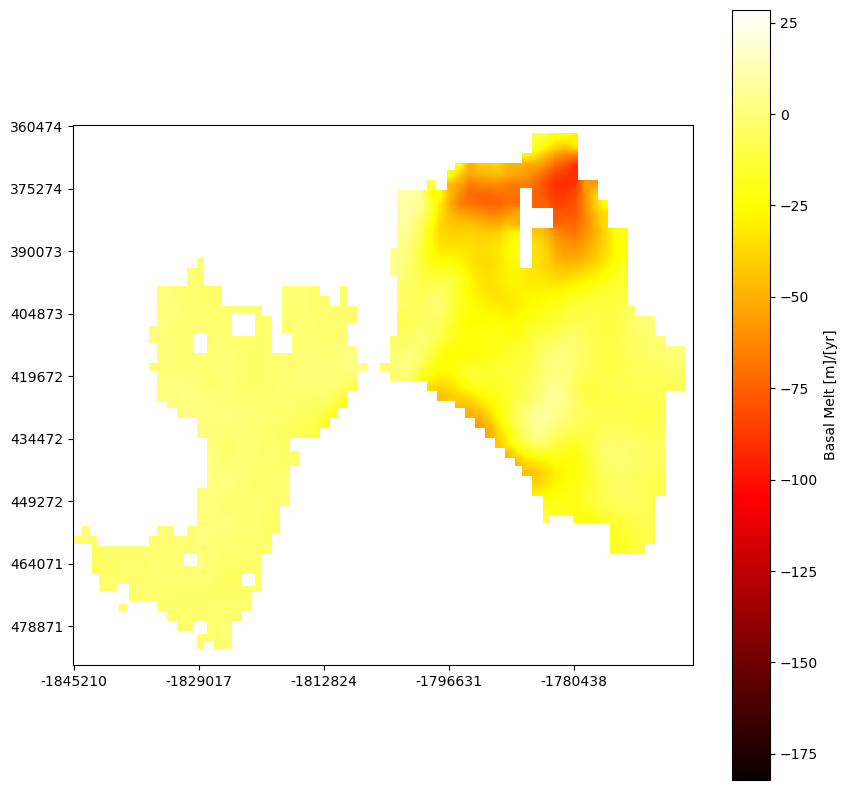

In [ ]:
#Gif of the glaciers evolution through time. The axis ticks are not fixed yet


id_prova = 55
time = np.arange(0,26,1)
years = [1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] #MANCA L'ANNO 1993


g_time_series = glacier_tif_df.loc[id_prova]# here we are looking at the index

#convert the pandas series to a numpy array
#g_time_num = g_time_series.values


#in this part i find the max and min, in order to do a proper plot
v_max = 0
v_min = 0

for y in years:
    max_temp = np.nanmax(g_time_series.loc[y])
    min_temp = np.nanmin(g_time_series.loc[y])
    #print(max_temp)
    if max_temp > v_max:
        v_max = max_temp
    if min_temp < v_min:
        v_min = min_temp    

print(v_max , v_min) 


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(g_time_series[years[0]], cmap = 'hot' , vmin=v_min, vmax=v_max)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Basal Melt [m]/[yr]')


#Axis ticks are not working, I need to fix them. The problem is that the x ticks are not in the right place

x_ticks = np.linspace(boundaries[id_prova][0], boundaries[id_prova][1], 10, dtype = int)
y_ticks = np.linspace(boundaries[id_prova][2], boundaries[id_prova][3], 10, dtype = int)


#ax.set_xticks(x_ticks)
#ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)

#ax.tick_params(axis='both', which='major', pad=10)

frames = []

for y in years:
    im.set_data(g_time_series[y])
    #ax.set_title(f"Glacier number {id_prova}, {Names[id_prova]}, Year: {years[y]}, coordinates: {np.round(lat_lon_coords[id_prova],3)}")
    #Set the title same as before, but with the coordinates rounder to 3 digits


    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)

imageio.mimsave('glacier_prova.gif', frames, fps=2)



In [ ]:
data_dictio = {
    'id': ids,
    'Name': Names,
    'Region': regions,
    'Coordinates': lat_lon_coords,
    'Boundaries': boundaries,
    'time_series_basal_melt': time_series_basal_melt_to_dataframe,
    'mean_basal_melt': mean_basal_melt,
    'std_basal_melt': std_basal_melt,
    'linear_coefficient': lin_coeff_to_dataframe,
    'r_2_linear': r_2,
}

df_compact = pd.DataFrame(data_dictio) #, index = ids)


ValueError: All arrays must be of the same length

In [ ]:
print(np.shape(mean_basal_melt))

(183,)


In [ ]:
#Caluclating the average basal melt for each glacier
def basal_melt_area_avg(df):
    basal_melt_avg = (df['mean_basal_melt']*df['area'])/df['area'].sum()
    return basal_melt_avg

In [ ]:
#Example of how to use the function

#Create a dataframe with 2 columns, one called A with a [1,2,3] array, and one called B with a [1,1,1] array
df_test = pd.DataFrame({'mean_basal_melt': [1,2,3], 'area': [1,1,1]})
print(df_test)
basal_melt_area_avg(df_test)

   mean_basal_melt  area
0                1     1
1                2     1
2                3     1


0    0.333333
1    0.666667
2    1.000000
dtype: float64

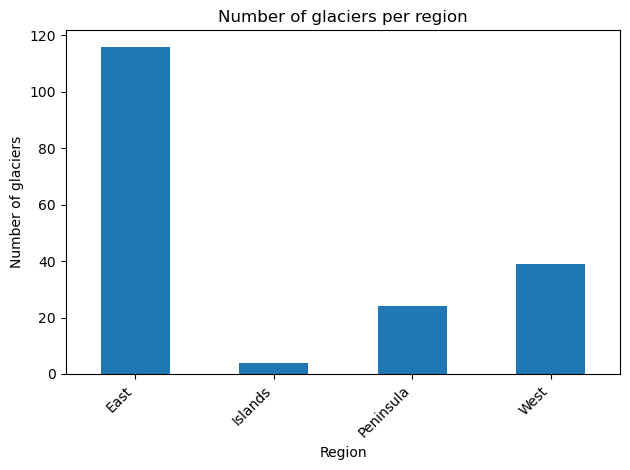

Region
East         116
Islands        4
Peninsula     24
West          39
Name: Name, dtype: int64


In [ ]:
df_compact.groupby('Region').count()['Name'].plot(kind='bar', title='Number of glaciers per region')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of glaciers')
plt.tight_layout()
plt.show()

print(df_compact.groupby('Region').count()['Name'])

/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_27117/1943883490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_compact.groupby('Region').sum()['area'].plot(kind='bar', title='Total Area per region')


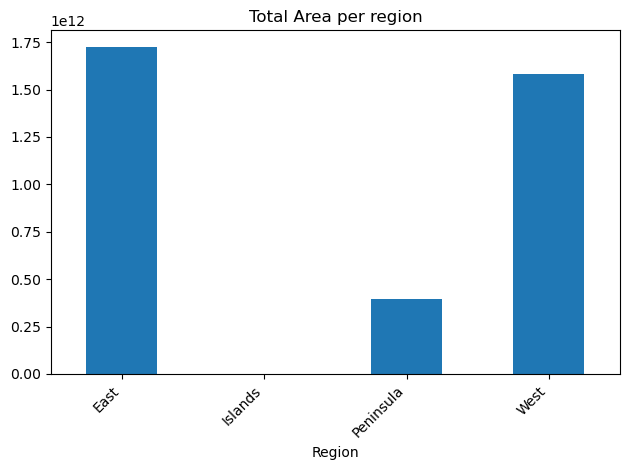

In [ ]:
df_compact.groupby('Region').sum()['area'].plot(kind='bar', title='Total Area per region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Mean basal melt per glacier'}, xlabel='id', ylabel='mean_basal_melt'>

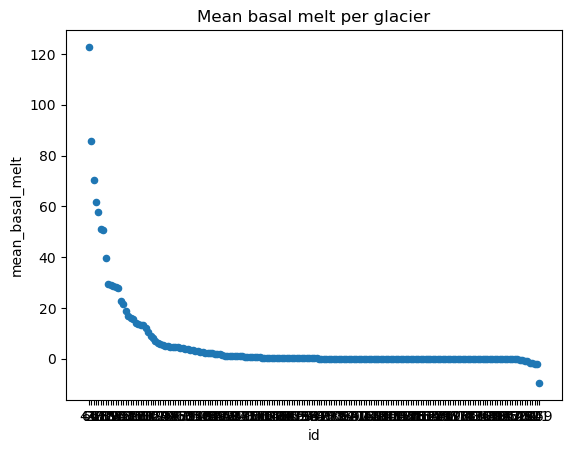

In [ ]:
#Plot the mean basal melt per glacier, ordered in a descending way

df_compact.sort_values(by='mean_basal_melt', ascending=False).plot(kind = 'scatter', y='mean_basal_melt', x = 'id', title='Mean basal melt per glacier')


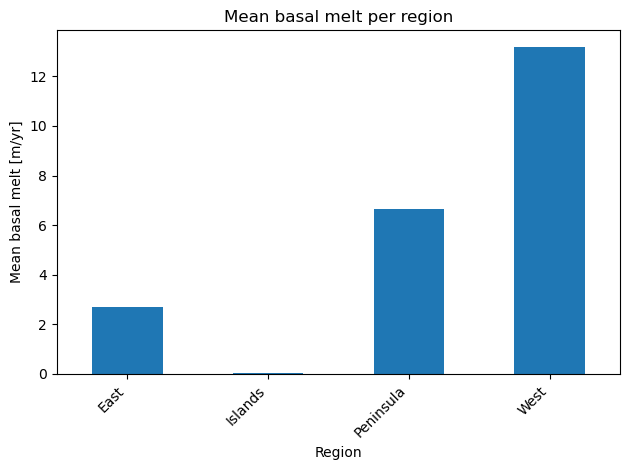

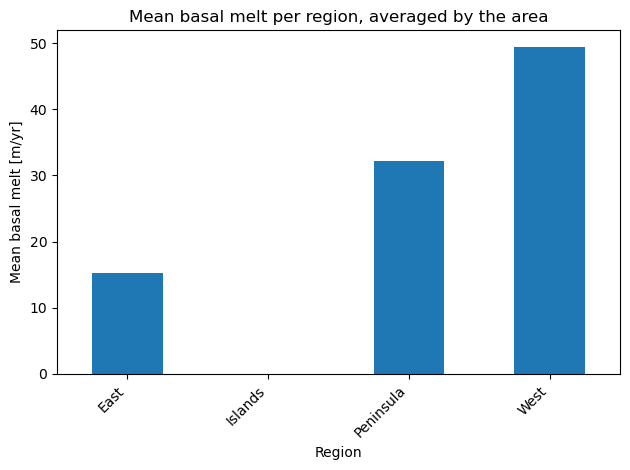

In [ ]:
#Plot the mean basal melt per region

df_compact.groupby('Region')['mean_basal_melt'].mean().plot(kind='bar', title='Mean basal melt per region')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean basal melt [m/yr]')
plt.tight_layout()
plt.show()

#Mean basal melt per region, averaged by the area

df_compact.groupby('Region').apply(lambda x: np.average(x['mean_basal_melt'], weights=x['area'])).plot(kind='bar', title='Mean basal melt per region, averaged by the area')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean basal melt [m/yr]')
plt.tight_layout()
plt.show()

2.712810353415111
0.13127377048730118


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_27117/3096035042.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_east.mean()['mean_basal_melt']) #ok, same that I get with the other plot


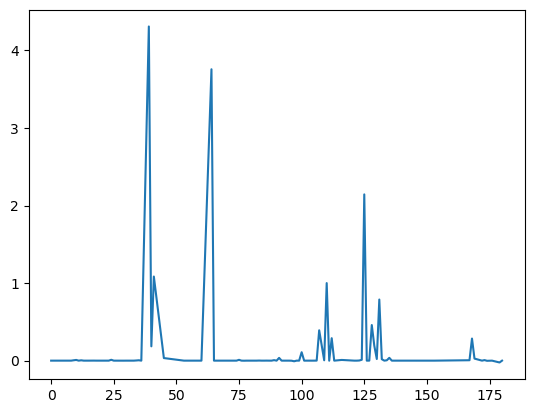

In [ ]:
#Testing my function

df_east = df_compact[df_compact['Region'] == 'East']
print(df_east.mean()['mean_basal_melt']) #ok, same that I get with the other plot

df_east_bm_avg = basal_melt_area_avg(df_east)
print(df_east_bm_avg.mean())
plt.plot(df_east_bm_avg)


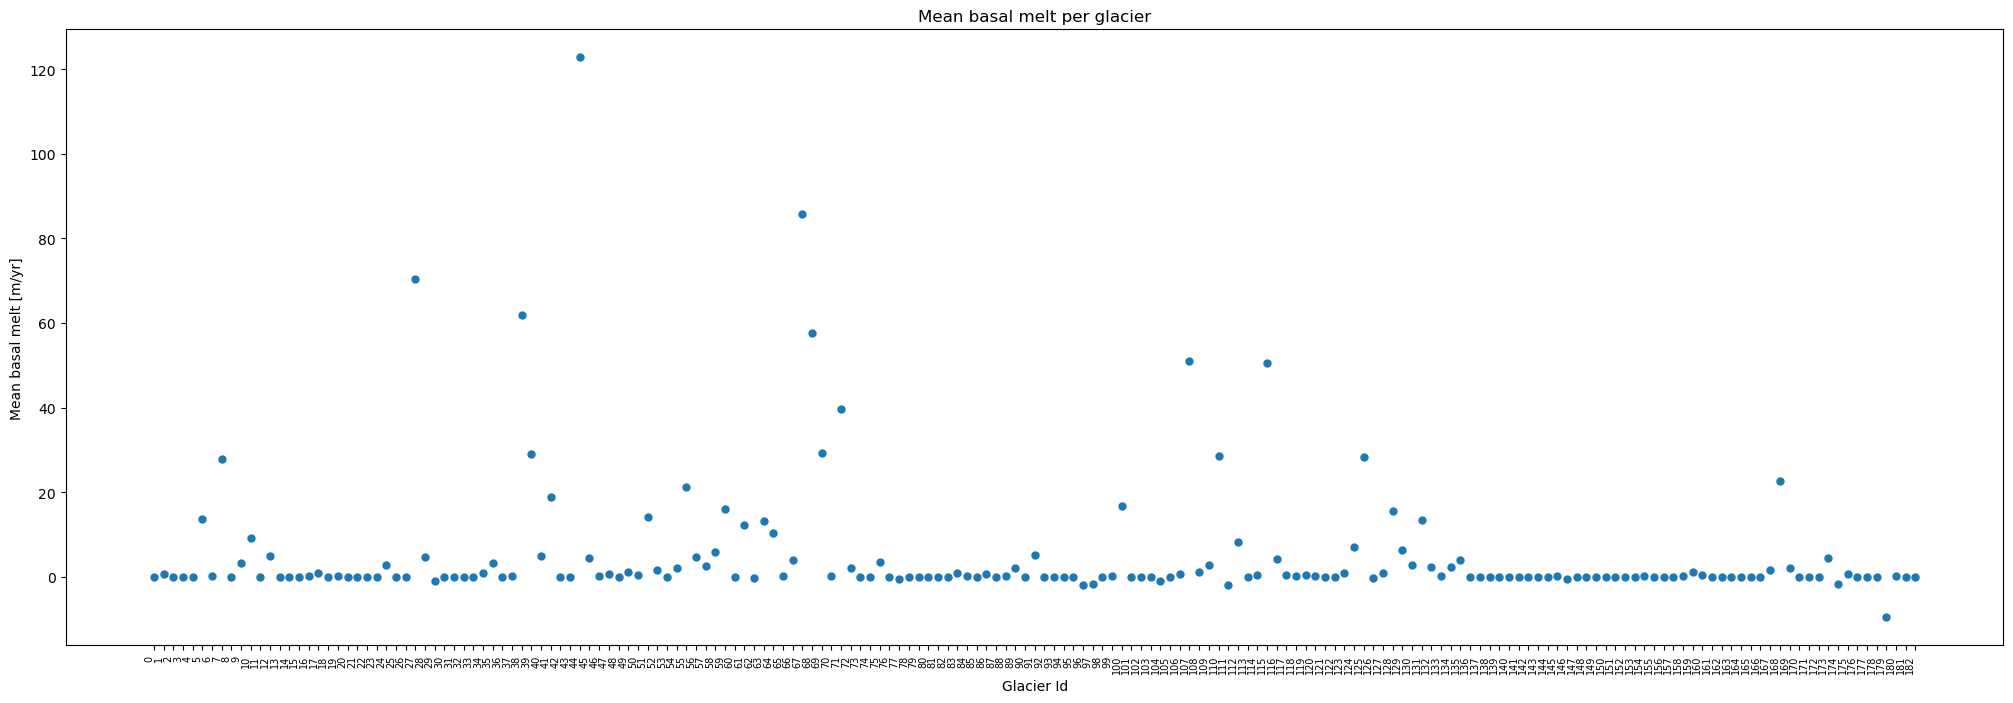

In [ ]:
#Plot the quantity mean basal melt per glacier

plt.plot(df_compact['id'], df_compact['mean_basal_melt'], 'o', markersize = 5)
#Enlarge the figure size
plt.gcf().set_size_inches(25, 8)


plt.title('Mean basal melt per glacier')
plt.xlabel('Glacier Id')
plt.xticks(rotation= 90, ha='right', fontsize = 7)
plt.ylabel('Mean basal melt [m/yr]')


plt.show()

In [ ]:
df_compact['mean_basal_melt']

0      0.0080
1      0.7180
2      0.0260
3      0.0352
4      0.0208
        ...  
178    0.0000
179   -9.5532
180    0.1812
181    0.0944
182    0.0000
Name: mean_basal_melt, Length: 183, dtype: float64

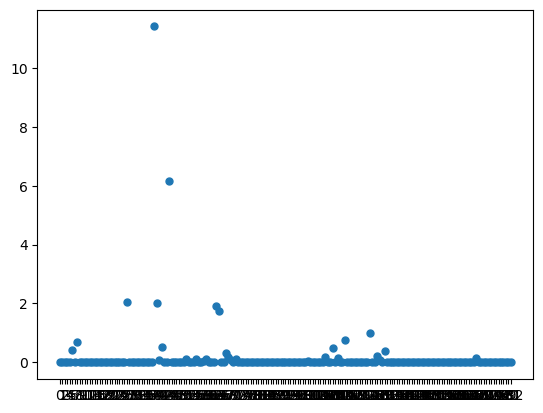

In [ ]:
plt.plot(df_compact['id'], basal_melt_area_avg(df_compact), 'o', markersize = 5)